In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.datasets import make_circles, make_moons, make_blobs
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
from torch.utils.data import TensorDataset, DataLoader

def BenchmarkToDataloader(dataset, batch_size):
    tensor_x = torch.Tensor(dataset[0])
    tensor_y = torch.Tensor(dataset[1])
    my_dataset = TensorDataset(tensor_x,tensor_y)
    my_dataloader = DataLoader(my_dataset,batch_size=batch_size,shuffle=True) 
    return my_dataloader

LABEL_TO_COLOR = {x: c for x, c in enumerate(['#a11a25', '#feadbb', '#3145ee', '#9aaaff', '#e8fd00',
                                              '#51ffbc', '#fe5c0d', '#fe00b9', '#77662c', '#00810a'])}

In [3]:
from deepcluster import Autoencoder, reconstruction_loss

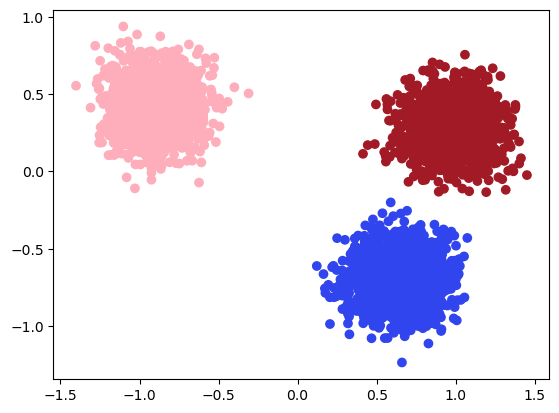

In [30]:
blobs = make_blobs(n_samples=5000, n_features=2, cluster_std=0.15, center_box=(-1.0, 1.0), shuffle=True)
color_labels = [LABEL_TO_COLOR[i] for i in blobs[1]]
plt.scatter(blobs[0][:,0], blobs[0][:,1], color = color_labels)
dl_blobs = BenchmarkToDataloader(blobs, batch_size = 128)

In [5]:
from deepcluster import DKM, dkm_loss

In [4]:
from deepcluster import DEC, kl_divergence

In [14]:
dec = DEC(input_dim=2, embed_dim=1, n_clusters=3, intermediate=[10, 20], activation_f=[nn.ReLU(), nn.ReLU()])

In [17]:
list(dec.parameters())

[Parameter containing:
 tensor([[0.3046],
         [0.1861],
         [0.0911]], requires_grad=True),
 Parameter containing:
 tensor([[-0.6072, -0.4990],
         [-0.5302,  0.2306],
         [ 0.5485, -0.4811],
         [ 0.5208,  0.6965],
         [-0.3014, -0.6623],
         [-1.0296,  0.1092],
         [ 0.4176, -0.1995],
         [ 0.4244, -0.2701],
         [-0.3019, -0.5117],
         [ 0.4941, -0.1027]], requires_grad=True),
 Parameter containing:
 tensor([-3.0741,  2.2228,  1.1567, -3.3870, -2.3754,  0.6195,  0.7600,  0.7455,
         -1.1932, -1.4616], requires_grad=True),
 Parameter containing:
 tensor([[ 2.2207e-02, -1.1881e-01,  4.4061e-01, -1.4694e-01,  1.4186e-01,
          -3.2663e-01, -1.2622e-01, -7.7014e-02,  6.8455e-02,  1.3277e-01],
         [-7.6297e-01,  1.5471e-01, -1.9426e-01, -1.4754e-01,  3.2863e-01,
          -4.4199e-01, -1.5997e-01, -3.4903e-01,  1.7255e-01,  1.0973e+00],
         [-2.1648e-01, -7.5845e-02,  3.6129e-02,  8.1098e-01,  7.0160e-02,
          

In [16]:
dec.ae_train(dl_blobs, epochs = 25, optimizer=torch.optim.Adam, optimizer_params={'lr': 0.01})

Learning Rate is updated
Learning Rate is updated
Learning Rate is updated
Layer 0 trained
Learning Rate is updated
Learning Rate is updated
Learning Rate is updated
Layer 1 trained
Learning Rate is updated
Learning Rate is updated
Learning Rate is updated
Layer 2 trained
	Epoch 1 \AvgLoss:  7.28012
	Epoch 2 \AvgLoss:  2.51068
	Epoch 3 \AvgLoss:  2.38825
	Epoch 4 \AvgLoss:  2.35382
	Epoch 5 \AvgLoss:  2.35034
	Epoch 6 \AvgLoss:  2.32208
	Epoch 7 \AvgLoss:  2.3264
	Epoch 8 \AvgLoss:  2.34333
	Epoch 9 \AvgLoss:  2.33295
	Epoch 10 \AvgLoss:  2.3278


In [ ]:
dec.pa

In [14]:
dec.fit_finetune(dl_blobs, optimizer=torch.optim.Adam, optimizer_params={'lr': 0.001})

	Epoch 1 	 AvgLoss:  0.00789
	Epoch 2 	 AvgLoss:  0.00822
	Epoch 3 	 AvgLoss:  0.00864
	Epoch 4 	 AvgLoss:  0.00919
	Epoch 5 	 AvgLoss:  0.00897
	Epoch 6 	 AvgLoss:  0.00839
	Epoch 7 	 AvgLoss:  0.00833
	Epoch 8 	 AvgLoss:  0.00812
delta label is 0.0008. Convergence reported at epoch 8.


In [5]:
from deepcluster import IDEC, idec_loss

In [10]:
idec = IDEC(input_dim=2, embed_dim=1, n_clusters=3, intermediate=[10, 20], activation_f=[nn.ReLU(), nn.ReLU()])

In [11]:
idec.ae_train(dl_blobs, epochs=5, pretrain_epochs=5)

Layer 0 trained
Layer 1 trained
Layer 2 trained
	Epoch 1 \AvgLoss:  43341.18522
	Epoch 2 \AvgLoss:  4046.80965
	Epoch 3 \AvgLoss:  680.21646
	Epoch 4 \AvgLoss:  465.26804
	Epoch 5 \AvgLoss:  370.20948


In [15]:
idec.fit_finetune(dl_blobs, epochs = 10)

	Epoch 1 	 AvgLoss:  208.85088 	 Rec Loss:  208.75529 	 KL Loss:  0.95584
	Epoch 2 	 AvgLoss:  100.83544 	 Rec Loss:  100.8066 	 KL Loss:  0.28839
	Epoch 3 	 AvgLoss:  69.65043 	 Rec Loss:  69.63737 	 KL Loss:  0.1306
	Epoch 4 	 AvgLoss:  52.03962 	 Rec Loss:  52.02932 	 KL Loss:  0.10296
	Epoch 5 	 AvgLoss:  39.93613 	 Rec Loss:  39.92818 	 KL Loss:  0.07944
	Epoch 6 	 AvgLoss:  31.02017 	 Rec Loss:  31.01406 	 KL Loss:  0.06106
	Epoch 7 	 AvgLoss:  25.06715 	 Rec Loss:  25.06017 	 KL Loss:  0.06988
	Epoch 8 	 AvgLoss:  20.82818 	 Rec Loss:  20.82262 	 KL Loss:  0.0556
	Epoch 9 	 AvgLoss:  17.60612 	 Rec Loss:  17.60137 	 KL Loss:  0.04749
	Epoch 10 	 AvgLoss:  15.2096 	 Rec Loss:  15.20493 	 KL Loss:  0.04668


In [5]:
from deepcluster import DCN, dcn_loss

In [6]:
dcn = DCN(input_dim=2, embed_dim=1, n_clusters=3, intermediate=[10, 20], activation_f=[nn.ReLU(), nn.ReLU()])

In [7]:
dcn.ae_pretrain(dl_blobs, epochs=5)

Layer 0 trained
Layer 1 trained
Layer 2 trained


In [8]:
dcn.fit(dl_blobs, epochs = 5)

torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([136, 2])
	Epoch 1 	 AvgLoss:  30.04806 	 Rec Loss:  28.68971 	 Clss Loss:  5.43339
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([256, 2])
torch.Size([136, 2])
	Epoch 2 	 AvgLoss:  5.82634 	 Rec Loss:  4.16107 	 Clss Loss:  6.66106
torch.Size([25

In [10]:
t1 , t2= dcn(list(dl_blobs)[0][0])

In [13]:
dcn_loss(list(dl_blobs)[0][0],t2, t1, torch.nn.functional.one_hot(torch.cdist(t2, dcn.centers).argmin(dim=1)),
         dcn.centers)

(tensor(204.1119, grad_fn=<AddBackward0>),
 tensor(195.4132, grad_fn=<MeanBackward0>),
 tensor(34.7948, grad_fn=<MeanBackward0>))

In [15]:
t1

tensor([[  7.7287,  -3.2454],
        [ -9.2541,  -5.3287],
        [  7.7528,  -3.2698],
        [  3.1757,   0.5556],
        [  7.6075,  -3.1224],
        [ -8.0357,  -4.6385],
        [ -9.0751,  -5.2273],
        [ -6.4956,  -3.7503],
        [  7.7743,  -3.2916],
        [  7.0427,  -2.5491],
        [  6.9226,  -2.4272],
        [  9.3151,  -4.8556],
        [  7.5150,  -3.0285],
        [ -7.2607,  -4.1994],
        [ -7.8888,  -4.5552],
        [  7.3521,  -2.8631],
        [  6.8932,  -2.3974],
        [  2.8115,   0.5298],
        [-10.2790,  -5.9093],
        [ -7.9114,  -4.5680],
        [  8.4564,  -3.9839],
        [ -7.4243,  -4.2921],
        [  2.5285,   0.3794],
        [-10.3648,  -5.9579],
        [  2.8796,   0.5346],
        [ -8.8006,  -5.0718],
        [-10.3793,  -5.9661],
        [  8.4970,  -4.0252],
        [  7.3244,  -2.8350],
        [  7.1819,  -2.6903],
        [  7.1924,  -2.7011],
        [  3.2935,   0.5524],
        [ -9.2637,  -5.3341],
        [-